#Introduction



Iris Plants are flowering plants with showy flowers. They are very popular among movie directors as it gives excellent background.

They are predominantly found in dry, semi-desert, or colder rocky mountainous areas in Europe and Asia. They have long, erect flowering stems and can produce white, yellow, orange, pink, purple, lavender, blue or brown colored flowers. There are 260 to 300 types of iris.

![alt text](https://cdn-images-1.medium.com/max/1275/1*7bnLKsChXq94QjtAiRn40w.png)

As you could see, flowers have 3 sepals and 3 petals.  The sepals are usually spreading or drop downwards and the petals stand upright, partly behind the sepal bases. However, the length and width of the sepals and petals vary for each type.


#### Description
The Iris dataset consists of 150 data instances. There are 3 classes (Iris Versicolor, Iris Setosa and Iris Virginica) each have 50 instances.


For each flower we have the below data attributes

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm



#Problem Statement
## The objective of this model is to understand the decision tree classifier by implementing on Iris data set.It is a classification problem as the target variables is 'species'.

# Data Extraction

###Importing libraries

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split

# Scaling and Encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Classification Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn.metrics import confusion_matrix,classification_report

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV


In [ ]:
! pip install graphviz

##Loading dataset

In [ ]:
df=pd.read_csv("/content/Iris (7).csv")


#Overview of the data




In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.drop('PassengerId',inplace=True,axis=1)

In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.duplicated().sum()

3

#Feature selection

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

#Exploratory Data Analysis & Data Visualization

In [ ]:
fig = px.pie(df, 'Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '],title='Data Distribution',template='plotly_dark')

fig.show()

## Sepal-Length

In [ ]:
fig = px.box(data_frame=df, x='Species',y='SepalLengthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',orientation='v')

fig.show()

In [ ]:
fig = px.histogram(data_frame=df, x='SepalLengthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',nbins=50)
fig.show()

## SepalWidth

In [ ]:
fig = px.box(data_frame=df, x='Species',y='SepalWidthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',orientation='v')
fig.show()

In [ ]:
fig = px.histogram(data_frame=df, x='SepalWidthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',nbins=30)
fig.show()

## Petal-Length

In [ ]:
fig = px.box(data_frame=df, x='Species',y='PetalLengthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',orientation='v')
fig.show()

In [ ]:
fig = px.histogram(data_frame=df, x='PetalLengthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',nbins=30)
fig.show()

## Petal-Width

In [ ]:
fig = px.box(data_frame=df, x='Species',y='PetalWidthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',orientation='v')
fig.show()

In [ ]:
fig = px.histogram(data_frame=df, x='PetalWidthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',nbins=30)
fig.show()

#Inferences from graph

### From these plots we conclude that:

* **Setosa has much smaller Petallength,PetalWidth than the other 2 classes**

* **This difference is less clear between Virginica and Versicolor**

* **Overall this seems like Petallength is an interesting feature**

In [ ]:
fig = px.scatter(data_frame=df, x='SepalLengthCm',y='SepalWidthCm'
           ,color='Species',size='PetalLengthCm', color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',)

fig.show()

In [ ]:
fig = px.scatter(data_frame=df, x='PetalLengthCm',y='PetalWidthCm'
           ,color='Species',size='SepalLengthCm', color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',)

fig.show()

### From this plots we conclude that:

* **The Setosa species generally have shorter sepal length and width compared to the other two species**

* **The Setosa species generally have shorter petal length and width compared to the other two species**

* **Versicolor and Virginica species overlap in terms of sepal length and width, making it more difficult to distinguish between them based on these two features alone**

* **There is a positive correlation between sepal length and petal length, as well as between sepal width and petal length..**

<a id="4"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>Model Implementation </center></h1>


  

#Splitting data :
##train-test-split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size = 0.2, random_state=42) #split the  data into traing and validating
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


#Model Implementation

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [ ]:
# PREDICTION BEFORE HYPER TUNING
y_pred = model.predict(x_test)

In [ ]:
dc_param_grid = {"max_depth":range(1,10),"min_samples_split":range(2,10),"criterion":["gini","entropy"]}

dtc = DecisionTreeClassifier(random_state=42)
dtc_cv = RandomizedSearchCV(dtc, param_distributions =dc_param_grid, cv = 5, n_iter=50, random_state=42)
dtc_cv.fit(x_train, y_train)

# Check the Best Parameters and Best Score
print("Best Parameters: " + str(dtc_cv.best_params_))
print("Best Score: " + str(dtc_cv.best_score_)) # best cross-validated accuracy score

Best Parameters: {'min_samples_split': 7, 'max_depth': 6, 'criterion': 'entropy'}
Best Score: 0.9416666666666668


In [ ]:
y_predict=dtc_cv.predict(x_test)


# Model Evaluation
  

### Performance metrics

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Evaluating after Hyper tunning:

In [ ]:
print(confusion_matrix(y_test,y_predict))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
print(classification_report(y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#DATA VISUALIZATION

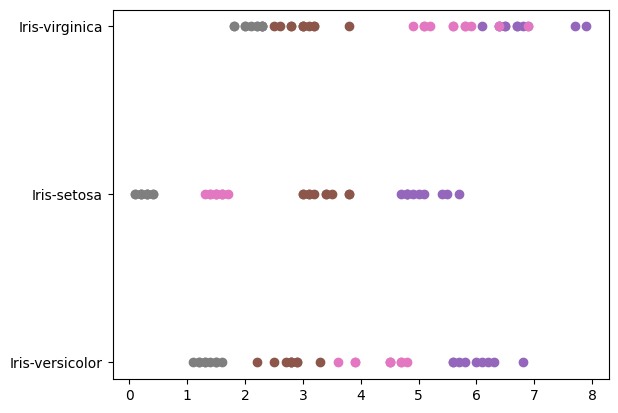

In [ ]:
plt.plot(x_test,y_test,'*')
plt.plot(x_test,y_pred,'o')

###Visualizing the tree

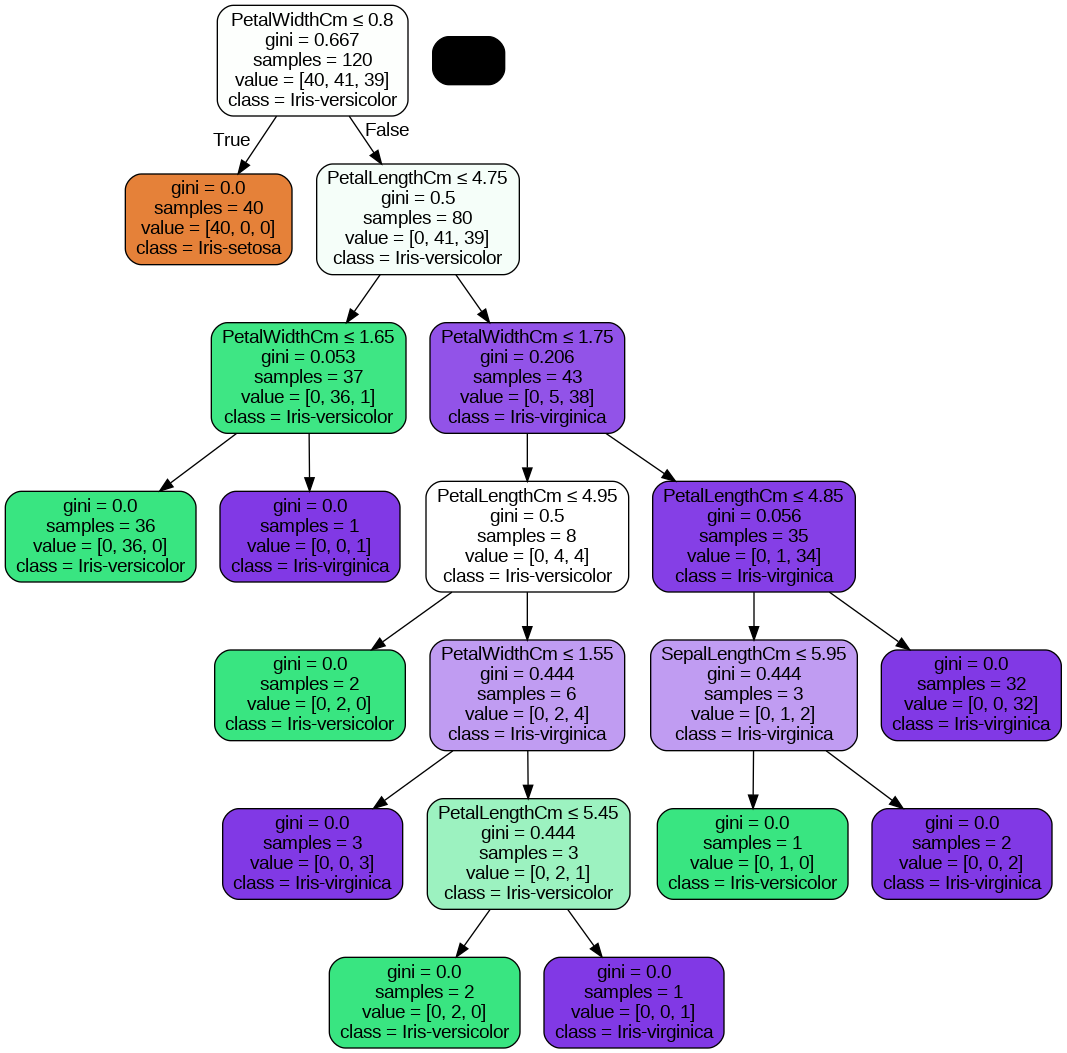

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('output.png')
Image(graph.create_png())